# All data retrived 04/10/2024
https://redistrictingdatahub.org/dataset/louisiana-block-pl-94171-2020-by-table/
https://redistrictingdatahub.org/dataset/vest-2020-louisiana-precinct-and-election-results/
https://redistrictingdatahub.org/dataset/2022-louisiana-congressional-districts-approved-plan/

In [22]:
import pandas as pd
import geopandas as gpd
import maup

In [23]:
maup.progress.enabled = True

In [24]:
population_df = gpd.read_file("la_pl2020_b/la_pl2020_p2_b.shp")

In [25]:
vap_df = gpd.read_file("la_pl2020_b/la_pl2020_p2_b.shp")

In [26]:
election_df = gpd.read_file("la_vest_20/la_vest_20.shp")

In [27]:
cong_df = gpd.read_file("la_cong_adopted_2022/HB1_Congress_221ES.shp")

In [28]:
print(cong_df.crs)
print(population_df.crs)
print(vap_df.crs)
print(election_df.crs)

EPSG:4269
EPSG:4269
EPSG:4269
EPSG:4269


In [29]:
population_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [30]:
election_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20PREOWES', 'G20PREOOTH', 'G20USSRCAS', 'G20USSRMUR',
       'G20USSDPER', 'G20USSDEDW', 'G20USSDPIE', 'G20USSDKNI', 'G20USSDWEN',
       'G20USSLSIG', 'G20USSIMEN', 'G20USSOPRI', 'G20USSOJOH', 'G20USSNBIL',
       'G20USSNBOU', 'G20USSNMON', 'G20USSNDAR', 'geometry'],
      dtype='object')

In [38]:
print(maup.doctor(election_df))

100%|██████████████████████████████████████| 3753/3753 [00:04<00:00, 836.97it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 1 holes.
False


In [39]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)

100%|█████████████████████████████████████| 3753/3753 [00:01<00:00, 2701.09it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before

In [40]:
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|█████████████████████████████████████| 3753/3753 [00:01<00:00, 2742.24it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before

In [41]:
vap_df.columns

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [45]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']
vap_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [46]:
print(maup.doctor(election_df))

100%|██████████████████████████████████████| 3753/3753 [00:04<00:00, 844.36it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 1 holes.
False


In [47]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [49]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0020001'].sum())
print(election_df['P0020001'].sum())

4657757
4657757
4657757
4657757


In [51]:
repaired_election_df = maup.quick_repair(election_df)

100%|██████████████████████████████████████| 3753/3753 [00:04<00:00, 841.45it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:139: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:142: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  left_areas, right_areas = split_by_level(geometries.area, overlaps.index)
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:143: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS befo

In [52]:
print(maup.doctor(repaired_election_df))

100%|██████████████████████████████████████| 3753/3753 [00:04<00:00, 839.96it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True


In [53]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  4.11it/s]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/shelger/miniconda3/envs/langchain/lib/python3.10/site-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before

In [54]:
print(set(election_df["CD"]))

{0, 1, 2, 3, 4, 5}


In [55]:
cong_df.dtypes

ID               int64
AREA           float64
OBJECTID         int64
DISTRICT_I       int64
NAME            object
NUM_MEMBER       int64
IDEAL_POP        int64
IS_LOCKED        int64
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [56]:
district_col_name = "DISTRICT_I"

In [57]:
for precinct_idx in range(len(election_df)):
    election_df.at[precinct_idx, "CD"] = cong_df.at[election_df.at[precinct_idx, "CD"], district_col_name]

In [58]:
set(cong_df[district_col_name])

{1, 2, 3, 4, 5, 6}

In [59]:
set(election_df["CD"])

{1, 2, 3, 4, 5, 6}

In [60]:
election_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20PREOWES', 'G20PREOOTH', 'G20USSRCAS', 'G20USSRMUR',
       'G20USSDPER', 'G20USSDEDW', 'G20USSDPIE', 'G20USSDKNI', 'G20USSDWEN',
       'G20USSLSIG', 'G20USSIMEN', 'G20USSOPRI', 'G20USSOJOH', 'G20USSNBIL',
       'G20USSNBOU', 'G20USSNMON', 'G20USSNDAR', 'geometry', 'P0020001',
       'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008', 'P0020009',
       'P0020010', 'P0020011', 'CD'],
      dtype='object')

In [61]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER'}

In [62]:
election_df.rename(columns=rename_dict, inplace=True)

In [63]:
election_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G20PRER', 'G20PRED',
       'G20PRELJOR', 'G20PREOWES', 'G20PREOOTH', 'G20USSRCAS', 'G20USSRMUR',
       'G20USSDPER', 'G20USSDEDW', 'G20USSDPIE', 'G20USSDKNI', 'G20USSDWEN',
       'G20USSLSIG', 'G20USSIMEN', 'G20USSOPRI', 'G20USSOJOH', 'G20USSNBIL',
       'G20USSNBOU', 'G20USSNMON', 'G20USSNDAR', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'CD'],
      dtype='object')

In [64]:
election_df.drop(columns=['G20PRELJOR', 'G20PREOWES', 'G20PREOOTH', 'G20USSRCAS', 'G20USSRMUR'], inplace=True)
election_df.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G20PRER', 'G20PRED',
       'G20USSDPER', 'G20USSDEDW', 'G20USSDPIE', 'G20USSDKNI', 'G20USSDWEN',
       'G20USSLSIG', 'G20USSIMEN', 'G20USSOPRI', 'G20USSOJOH', 'G20USSNBIL',
       'G20USSNBOU', 'G20USSNMON', 'G20USSNDAR', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'CD'],
      dtype='object')

<Axes: >

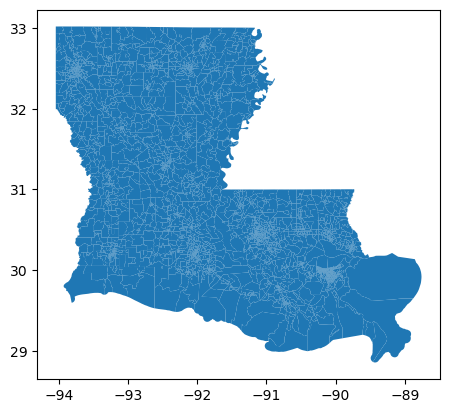

In [65]:
election_df.plot()

In [66]:
election_df.to_file('./la_election_shape/la_election_shapefile.shp')